# 9 Clustering 

In [93]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)



**Note:** The next few lines of code will read in data and variables used in lesson 9, prior to approaching the DBSCAN portion of the assignment.

In [ ]:
#read in the road data used in Lesson 9, renaming data file from X to roads

roads = pd.read_csv('/Users/jMac/Documents/ML_Portfolio_Morgia/data/3D_spatial_network.txt', header=None, names=['osm', 'lat','lon','alt'])
# renaming columns lat, lon, alt, osm

roads = roads.drop(['osm'], axis=1).sample(10000) #drops the osm column; picks out 10,000 datapoints
roads.head()

#remember there is no y (no classification predefined)

In [ ]:
# K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(roads)



In [ ]:
# review the cluster labels
set(km.labels_)

In [ ]:
roads['cluster'] = km.predict(roads)

In [ ]:
roads.cluster.value_counts()

In [ ]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)
colors=np.array(['r','b','g','y'])

plt.cla()

ax.scatter(roads['lat'], roads['lon'], roads['alt'], c=colors[roads.cluster], s=5)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

In [ ]:
roads2 = roads.copy()
roads2['alt'] = (roads.alt - roads.alt.mean())/roads.alt.std()
roads2['lat'] = (roads.lat - roads.lat.mean())/roads.lat.std()
roads2['lon'] = (roads.lon - roads.lon.mean())/roads.lon.std()


In [ ]:


km = KMeans(n_clusters=N, random_state=1)
roads2['cluster'] = km.fit_predict(roads2[['lon', 'lat', 'alt']])



In [ ]:


fig = plt.figure()
plt.scatter(roads2.lon, roads2.alt, c=roads2.cluster, s=5, cmap='Paired')

plt.xlabel('lon')
plt.ylabel('alt')
plt.show()



## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [ ]:
#Init signature: DBSCAN(eps=0.5, min_samples=5, metric='euclidean', 
    #algorithm='auto', leaf_size=30, p=None, n_jobs=1)

In [ ]:
from sklearn.cluster import DBSCAN
colors=np.array(['r','b','g','y'])


In [ ]:

dbscan = DBSCAN()
roads.cluster = dbscan.fit_predict(roads[['lat','lon', 'alt']])



In [ ]:
#iterate values of min_samples from 1 to 10 and epsilon from 0.05 to 0.5 in steps of 0.01.

for i, min_samples in enumerate([1,2,3,4,5,6,7,8,9,10]):
    for j, eps in enumerate([.05, .10, .15, .20,.25,.30,.35,.40,.45,.5]):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)


In [ ]:
dbscan

In [ ]:
next(r)

In [ ]:
DBSCAN(eps==next(epsi), min_samples==next(samples), metric='euclidean', alogrithm='auto', leaf_size=30, n_jobs=1)


In [ ]:
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(XX[['lon', 'lat', 'alt']])
    scores.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

In [ ]:
fig,axes=plt.subplots(3,4,figsize=(12,6), subplot_kw={'xticks': (), 'yticks': ()})

for i, min_samples in enumerate([1,2,3,4,5,6,7,8,9,10]):
    for j, eps in enumerate([0.05, ])


for i, min_samples in enumerate([2,3,5]):
    for j, eps in enumerate([1,1.5,2,3]):
        dbscan=DBSCAN(min_samples=min_samples,eps=eps)
        clusters=dbscan.fit_predict(roads)
        print('min_samples: %d eps: %.1f clusters: %s'%(min_samples,eps,clusters))
        sizes=30*np.ones(roads.shape[0])
        sizes[dbscan.core_sample_indices_]*=8 ###enlarge the core points by 8 times
        axes[i,j].scatter(roads[:,0],roads[:,1],c=colors[clusters],s=sizes)
        axes[i,j].set_title('min_samples: %d eps: %0.1f'%(min_samples,eps))
fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

### Note: Analyzing the auto.csv file because it's a smaller file and actually ran on my machine.  I was having issues with a much larger dataset (MBs instead of KBs) and even the sampling was causing errors. 

In this analysis, we can look at how mpg's are affected by horespower and weight. For most automobiles, particularly those made before the fuel-efficiency craze of the past decade, the higher the horsepower the less miles per gallon. However, there have been exceptions to the rule-- most notably the Corvette-- which has decent mpg considering its high horsepower output. This may be due to its weight and aerodynamic design, I'm interested to test out this theory.

The following algorithms will determine groupings within the data.  

In [106]:
#read in  auto dataset (18kb large), many variables to include mpg, weight, hp, cylinders, etc

auto = pd.read_csv('/Users/jMac/Desktop/Autos.csv')
auto.dropna(inplace=True) #discards all na values

auto = auto.drop(['name'], axis=1)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [107]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

**Note:** Because horsepower is an object data type, we need to convert it to an integer.

In [108]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [109]:
auto.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
year            False
origin          False
dtype: bool

In [110]:
auto = auto.fillna(method='ffill') #need to fill in any missing values

In [111]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [112]:
auto.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
dtype: bool

### After formatting the data with the correct data types and eliminating or filling in for missing values. Now on to K-means with clusters.

In [122]:
# K-means with N clusters
N = 5
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(auto)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [123]:
# review the cluster labels
set(km.labels_)

{0, 1, 2, 3, 4}

In [124]:
auto['cluster'] = km.predict(auto)

In [125]:
auto.cluster.value_counts()

2    139
0     95
4     70
1     52
3     41
Name: cluster, dtype: int64

In [126]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cluster
0,18.0,8,307.0,130.0,3504,12.0,70,1,4
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,4
3,16.0,8,304.0,150.0,3433,12.0,70,1,4
4,17.0,8,302.0,140.0,3449,10.5,70,1,4
5,15.0,8,429.0,198.0,4341,10.0,70,1,3
6,14.0,8,454.0,220.0,4354,9.0,70,1,3
7,14.0,8,440.0,215.0,4312,8.5,70,1,3
8,14.0,8,455.0,225.0,4425,10.0,70,1,3
9,15.0,8,390.0,190.0,3850,8.5,70,1,1


**Note:** There's a nice distribution of the 397 points into the four clusters (and as shown by the new column, "cluster").  Let's see how this plots out.

In [135]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'purple', 'gray'])

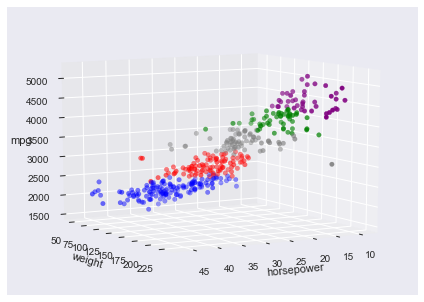

In [146]:
#first plot of the values, looking at how mpg is affected by horsepower and weight

fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=60)

plt.cla()

ax.scatter(auto['mpg'], auto['horsepower'], auto['weight'], c=colors[auto.cluster], s=20)

ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
plt.show()



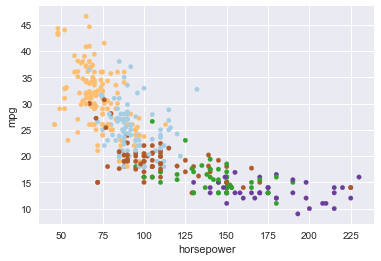

In [145]:
#first plot of the values, looking at how mpg is affected by horsepower and weight. Now with color pairs in 2D

fig = plt.figure()
plt.scatter(auto.horsepower, auto.mpg, c=auto.cluster, s=20, cmap='Paired')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()



**Observation:** It appers from plotting the data that there is an inverse relationship between horsepower and mpg (that is the higher the HP the lower the mpg).  But looking at the clusters, particularly factoring weight, there seems to be clear groupings and some points that don't fit this paradigm of an inverse relationship. Let's see what happens when we normalize the data.

In [153]:
auto2 = pd.read_csv('/Users/jMac/Desktop/Autos.csv')

auto2.dropna(inplace=True) #discards all na values

auto2 = auto2.drop(['name'], axis=1)

In [154]:
auto2['horsepower'] = pd.to_numeric(auto2['horsepower'], errors='coerce')
auto2 = auto2.fillna(method='ffill') #need to fill in any missing values


In [155]:
auto2.isnull().any() #check for nulls

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
dtype: bool

In [156]:
# auto2 = auto.copy()  NOTE: this function did not work as well as hoped.  Kept getting TypeError: 'KMeans' object does not support item assignment
auto2['horsepower'] = (auto.horsepower - auto.horsepower.mean())/auto.horsepower.std()
auto2['weight'] = (auto.weight - auto.weight.mean())/auto.weight.std()
auto2['mpg'] = (auto.mpg - auto.mpg.mean())/auto.mpg.std()

In [157]:
auto2

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.704831,8,307.0,0.672720,0.629479,12.0,70,1
1,-1.088178,8,350.0,1.585647,0.852382,11.5,70,1
2,-0.704831,8,318.0,1.194392,0.549281,11.0,70,1
3,-0.960396,8,304.0,1.194392,0.545743,12.0,70,1
4,-0.832613,8,302.0,0.933556,0.564613,10.5,70,1
5,-1.088178,8,429.0,2.446405,1.616619,10.0,70,1
6,-1.215961,8,454.0,3.020245,1.631951,9.0,70,1
7,-1.215961,8,440.0,2.889827,1.582417,8.5,70,1
8,-1.215961,8,455.0,3.150663,1.715687,10.0,70,1
9,-1.088178,8,390.0,2.237737,1.037544,8.5,70,1


In [162]:
# K-means with N clusters
N = 5
from sklearn.cluster import KMeans
km2 = KMeans(n_clusters=N, random_state=1)
km2.fit(auto2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [163]:
set(km2.labels_)

{0, 1, 2, 3, 4}

In [164]:
auto2['cluster2'] = km2.predict(auto2)


In [166]:
auto2.cluster2.value_counts()

1    132
3     94
4     73
0     73
2     25
Name: cluster2, dtype: int64

**Note:** There was some trouble getting the fit and predict line of code to run, i.e. auto2['cluster'] = km.fit_predict(auto2[['horsepower', 'weight', 'mpg']]). Kept getting TypeError: 'KMeans' object does not support item assignment. Breaking it up into the component parts, allowed it to work.

**Observation:** In the normalized dataset, the clusters are different and the value counts are different. It's an interesting find in our 397 data points. The cluster with the most values in the unnormalized values (cluster 2) now has the least number of values. 

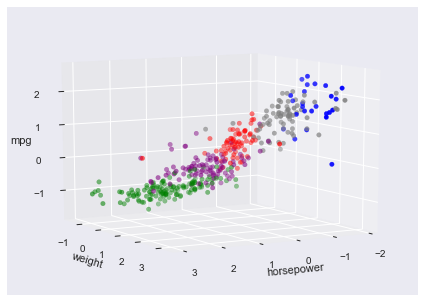

In [169]:
# plot of the values from the normalized dataset, looking at how mpg is affected by horsepower and weight. in 3D

fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=60)

plt.cla()

ax.scatter(auto2['mpg'], auto2['horsepower'], auto2['weight'], c=colors[auto2.cluster2], s=20)

ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
plt.show()


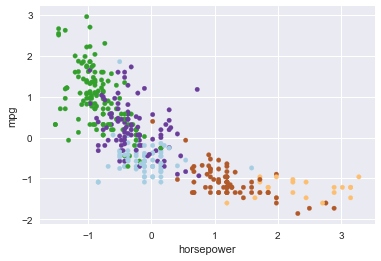

In [170]:
# plot of the values from the normalized dataset, looking at how mpg is affected by horsepower and weight. Now with color pairs in 2D

fig = plt.figure()
plt.scatter(auto2.horsepower, auto2.mpg, c=auto2.cluster2, s=20, cmap='Paired')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()


**Observation:** Though the relationship in the 2D plot shows a similar inverse relationship between horsepower and mpg, the number of data points in each band is different than the unnormalized dataset. It appears in the normalized dataset that there is a greater spread within the bands (more overlaps than before). Additionally, in the 3D plot, it shows the distribution of the dots are less spread out (meaning there is more similarity in the clusters on the left side than the right side of the plot).



### Clustering with DBSCAN

In [188]:
auto3 = pd.read_csv('/Users/jMac/Desktop/Autos.csv')

auto3.dropna(inplace=True) #discards all na values

auto3 = auto3.drop(['name'], axis=1)

auto3['horsepower'] = pd.to_numeric(auto3['horsepower'], errors='coerce')
auto3 = auto3.fillna(method='ffill') #need to fill in any missing values
auto3.isnull().any() #check for nulls

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
dtype: bool

In [189]:
auto3['horsepower'] = (auto3.horsepower - auto3.horsepower.mean())/auto3.horsepower.std()
auto3['weight'] = (auto3.weight - auto3.weight.mean())/auto3.weight.std()
auto3['mpg'] = (auto3.mpg - auto3.mpg.mean())/auto3.mpg.std()

In [190]:
auto3

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.704831,8,307.0,0.672720,0.629479,12.0,70,1
1,-1.088178,8,350.0,1.585647,0.852382,11.5,70,1
2,-0.704831,8,318.0,1.194392,0.549281,11.0,70,1
3,-0.960396,8,304.0,1.194392,0.545743,12.0,70,1
4,-0.832613,8,302.0,0.933556,0.564613,10.5,70,1
5,-1.088178,8,429.0,2.446405,1.616619,10.0,70,1
6,-1.215961,8,454.0,3.020245,1.631951,9.0,70,1
7,-1.215961,8,440.0,2.889827,1.582417,8.5,70,1
8,-1.215961,8,455.0,3.150663,1.715687,10.0,70,1
9,-1.088178,8,390.0,2.237737,1.037544,8.5,70,1


**Note:** Had to reload the original file, I was having a few ValueErrors when either making a copy of the file or reusing Auto2 for the DBSCAN.   

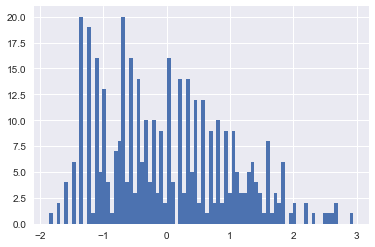

In [224]:
fig = plt.figure()
auto3.mpg.hist(bins=80)

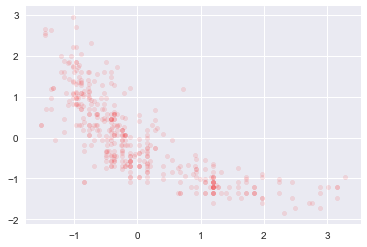

In [222]:
fig = plt.figure()
plt.scatter(auto2.horsepower, auto2.mpg, alpha=.1, s=20, c='red')

**Note:** In the histogram plot above, we see that the majority of the data points lie between -1 and 1.  Let's try DBSCAN and vary the epsilon and min_samples to see how the clustering pans out.

#### DBSCAN with epsilon = 0.5 and min_samples = 20

In [248]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.5, min_samples = 20)

In [249]:
auto3.cluster = dbscan.fit_predict(auto3[['horsepower', 'weight', 'mpg']])


# the value counts was running into an AttributeError: numpy.ndarray object has no attribute value_counts
#auto3.cluster.value_counts()

In [250]:
dbscan.fit(auto3)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=20, n_jobs=1, p=None)

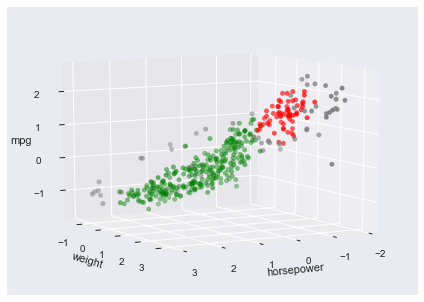

In [251]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=60)

plt.cla()

ax.scatter(auto3['mpg'], auto3['horsepower'], auto3['weight'], c=colors[auto3.cluster], s=20)

ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
plt.show()



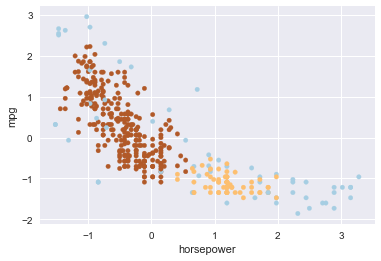

In [252]:
fig = plt.figure()
plt.scatter(auto3.horsepower, auto3.mpg, c=auto3.cluster, s=20, cmap='Paired')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

#### DBSCAN with epsilon = 0.1 and min_samples = 20

In [272]:
dbscan2 = DBSCAN(eps=.1, min_samples = 20)
auto3.cluster = dbscan2.fit_predict(auto3[['horsepower', 'weight', 'mpg']])

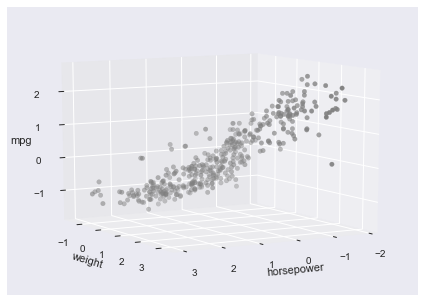

In [273]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=60)

plt.cla()

ax.scatter(auto3['mpg'], auto3['horsepower'], auto3['weight'], c=colors[auto3.cluster], s=20)

ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
plt.show()

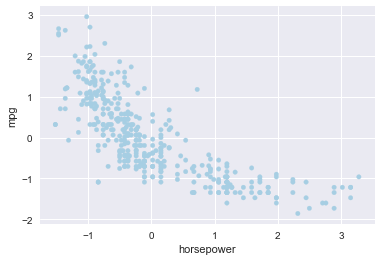

In [274]:
fig = plt.figure()
plt.scatter(auto3.horsepower, auto3.mpg, c=auto3.cluster, s=20, cmap='Paired')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

#### DBSCAN with epsilon = 0.5 and min_samples = 2

In [256]:
dbscan3 = DBSCAN(eps=.5, min_samples = 2)
auto3.cluster = dbscan3.fit_predict(auto3[['horsepower', 'weight', 'mpg']])

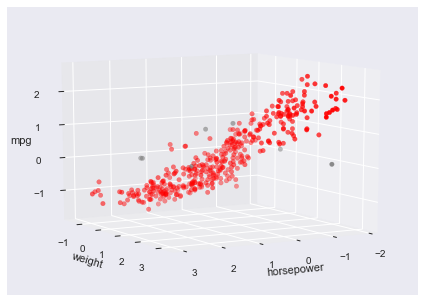

In [257]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=60)

plt.cla()

ax.scatter(auto3['mpg'], auto3['horsepower'], auto3['weight'], c=colors[auto3.cluster], s=20)

ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
plt.show()

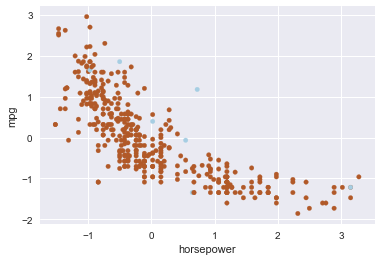

In [258]:
fig = plt.figure()
plt.scatter(auto3.horsepower, auto3.mpg, c=auto3.cluster, s=20, cmap='Paired')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

#### DBSCAN with epsilon = 0.3 and min_samples = 5

In [269]:
dbscan4 = DBSCAN(eps= 0.3, min_samples = 5)
auto3.cluster = dbscan4.fit_predict(auto3[['horsepower', 'weight', 'mpg']])

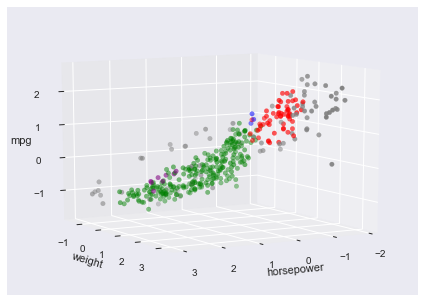

In [270]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=60)

plt.cla()

ax.scatter(auto3['mpg'], auto3['horsepower'], auto3['weight'], c=colors[auto3.cluster], s=20)

ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
plt.show()

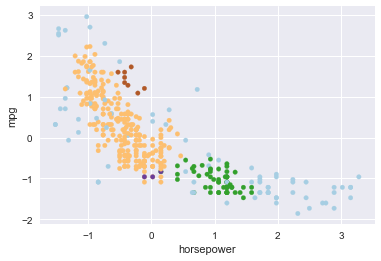

In [271]:
fig = plt.figure()
plt.scatter(auto3.horsepower, auto3.mpg, c=auto3.cluster, s=20, cmap='Paired')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()


**Observation:** It appears that the KMeans clustering algorithm works best with this dataset. In the DBSCAN runs, the results improved when the epsilon value was less than 0.5 and the min_samples was greater than 3. Though there wasn't as much stratification as there was in the KMeans results. Let's work through some clustering performance evaluations to see how they did. 

### Clustering Performance Evaluations

**Note:** Because we do not have labeled predicted values (e.g., we're not predicting a yes or no answer, such as has heart disease or not), we will have to use the silhouette coefficient to show performance.

In [279]:
# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(auto[['horsepower', 'weight', 'mpg']], auto.cluster)

0.5665974152864085

**Observation:** Looking at the clusters before normalizing the data, our score was 0.56.  Not that great, but not horrible.  Let's check it out with the normalized values.

In [280]:
metrics.silhouette_score(auto2[['horsepower', 'weight', 'mpg']], auto2.cluster2)

0.23197605939682003

**Observation:** It appears that our score was much better with the non-normalized data, as this SC showed 0.23.  

In [282]:
# calculate SC for K=2 through K=19
k_range = range(2, 40)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(auto[['horsepower', 'weight', 'mpg']])
    scores.append(metrics.silhouette_score(auto[['horsepower', 'weight', 'mpg']], labels))

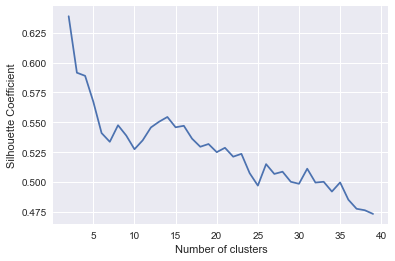

In [283]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()



In [284]:
# calculate SC for K=2 through K=19
k_range = range(2, 40)
scores = []
for k in k_range:
    km2 = KMeans(n_clusters=k, random_state=1)
    labels = km2.fit_predict(auto2[['horsepower', 'weight', 'mpg']])
    scores.append(metrics.silhouette_score(auto2[['horsepower', 'weight', 'mpg']], labels))

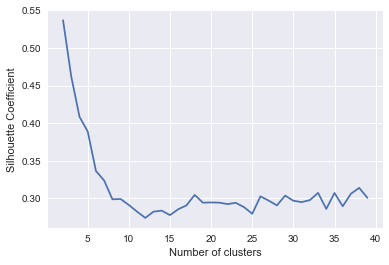

In [285]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()


**Observation:** Plotted the scores for both the non-normalized dataset ("auto") and the normalized dataset ("auto2").  In both graphs, it appears that the performance generally decays as the number of clusters increases. This demonstrates that the non-normalized data appears to have the higher SC values, reaching between 0.5 and 0.63 when clusters were less than 5.  

### PCA [BONUS]

In PCA, we can plot the various dimensions and see them in clusters. PCA could help decompose the data from 8 dimensions to less.

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA #decomposing data in PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [295]:
auto4 = pd.read_csv('/Users/jMac/Desktop/Autos.csv')

auto4.dropna(inplace=True) #discards all na values


auto4['horsepower'] = pd.to_numeric(auto4['horsepower'], errors='coerce')
auto4 = auto4.fillna(method='ffill') #need to fill in any missing values
auto4.isnull().any() #check for nulls

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [296]:
auto4.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [297]:
auto4 = auto4.drop(['name'], axis=1)


#### Now that all columns are integers, let's try to apply PCA. Where we are clustering to predict the mpg values of various automobiles.

In [298]:
centers = [[1, 1], [-1, -1], [1, -1]]

X = auto4[auto4.columns[1:-1]]
y = auto4['mpg']

In [ ]:
X = X.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.